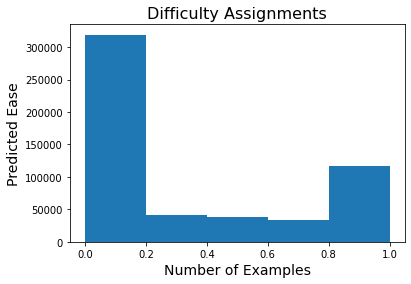

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

reg_worst = pd.read_json("/home/antonio/from_source/CL-Inference/humanStudy/snli/snli_1.0/snli_1.0_train_sorted_worst.jsonl",lines=True)
reg_worst.sort_values(by='predictedEase', ascending=False, inplace=True)
reg_worst.drop(["annotator_labels","captionID","pairID","sentence1_binary_parse","sentence1_parse","sentence2_binary_parse","sentence2_parse"],axis=1,inplace=True)
plt.hist(reg_worst['predictedEase'],bins=5)
plt.title("Difficulty Assignments",fontsize=16)
plt.xlabel("Number of Examples",fontsize=14)
plt.ylabel("Predicted Ease",fontsize=14)
plt.show()

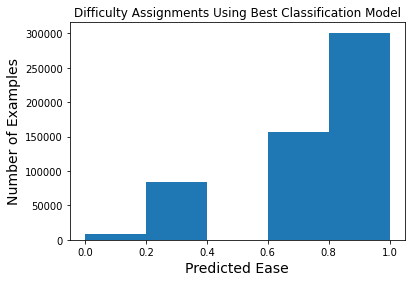

In [16]:
reg_worst = pd.read_json("/home/antonio/from_source/CL-Inference/humanStudy/snli/snli_1.0/snli_1.0_train_classification.jsonl",lines=True)
reg_worst.sort_values(by='predictedEase', ascending=False, inplace=True)
reg_worst['predictedEase'] = reg_worst['predictedEase']/3.0
reg_worst.drop(["annotator_labels","captionID","pairID","sentence1_binary_parse","sentence1_parse","sentence2_binary_parse","sentence2_parse"],axis=1,inplace=True)
plt.hist(reg_worst['predictedEase'],bins=5)
plt.title("Difficulty Assignments Using Best Classification Model",fontsize=12)
plt.ylabel("Number of Examples",fontsize=14)
plt.xlabel("Predicted Ease",fontsize=14)
plt.savefig('best.png', bbox_inches='tight')
plt.show()

In [12]:
df = pd.read_json("/home/antonio/from_source/CL-Inference/humanStudy/snli/snli_1.0/snli_1.0_train.jsonl",lines=True)
agreement = [labels.count(gold_label) for labels, gold_label in zip(list(df['annotator_labels'].values), list(df['gold_label'].values)) if gold_label != '' and labels]

# calculate the agreement
agr = pd.DataFrame(agreement, columns=['agreement'])
agr = 1.0 - agr/5.0
# apparently 0.0, 0.6, 0.8, 1.0 are the only possible options, so mapping them to classes
labels = {'key_0.0': 0, 'key_0.2': 1, 'key_0.4': 2,  'key_0.6': 3, 'key_0.8': 4, 'key_1.0': 5}

In [5]:
# df = pd.DataFrame({
#     'text_a': df['sentence1'],
#     'text_b': df['sentence2'],
#     'labels': agr['agreement']/5
# })

# for index, row in df.iterrows():
#     df['labels'][index] = int(labels['key_' + str(row['labels'])])


<ipython-input-5-b32d1ee8be1d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'][index] = int(labels['key_' + str(row['labels'])])


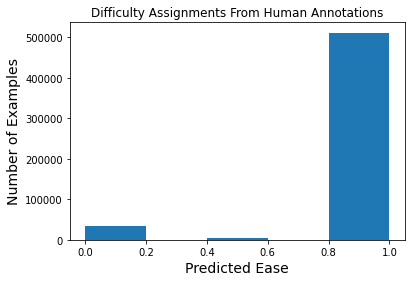

In [15]:
plt.hist(agr['agreement'],bins=5)
plt.title("Difficulty Assignments From Human Annotations",fontsize=12)
plt.ylabel("Number of Examples",fontsize=14)
plt.xlabel("Predicted Ease",fontsize=14)
plt.savefig('best_human.png', bbox_inches='tight')
plt.show()